In [70]:
import pandas as pd 
import numpy as np

In [71]:
df=pd.read_csv('retail_store_sales.csv')

In [72]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [74]:
df.shape

(12575, 11)

In [75]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [76]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


## UNIQUE CATEGORIES

In [77]:

unique_categories = df['Category'].unique()
num_categories = df['Category'].nunique()

print("Unique Categories:")
print(unique_categories)
print(f"\nTotal number of unique categories: {num_categories}")


Unique Categories:
['Patisserie' 'Milk Products' 'Butchers' 'Beverages' 'Food' 'Furniture'
 'Electric household essentials' 'Computers and electric accessories']

Total number of unique categories: 8


In [78]:
unique_categories

array(['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories'], dtype=object)

In [79]:
df['Category'] = df['Category'].replace({
    'Electric household essentials': 'electric',
    'Computers and electric accessories': 'computers'
})


In [80]:
num_categories

8

In [81]:
df['Category'] = df['Category'].replace({
    'Electric household essentials': 'electric',
    'Computers and electric accessories': 'computers'
})


In [82]:
df.sample(200)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
2388,TXN_7564934,CUST_09,Beverages,Item_14_BEV,24.5,10.0,245.0,Credit Card,In-store,2023-07-23,False
10819,TXN_3443251,CUST_10,Furniture,Item_3_FUR,8.0,8.0,64.0,Digital Wallet,Online,2024-03-12,True
9864,TXN_6787087,CUST_22,Beverages,Item_14_BEV,24.5,10.0,245.0,Credit Card,Online,2022-10-06,False
88,TXN_2414530,CUST_24,Milk Products,Item_8_MILK,15.5,8.0,124.0,Cash,Online,2024-06-20,NaN
12067,TXN_3412638,CUST_04,electric,Item_9_EHE,17.0,1.0,17.0,Digital Wallet,Online,2022-11-28,True
...,...,...,...,...,...,...,...,...,...,...,...
9762,TXN_6959290,CUST_04,Patisserie,Item_23_PAT,38.0,5.0,190.0,Digital Wallet,Online,2023-04-24,True
5593,TXN_5779439,CUST_09,computers,Item_8_CEA,15.5,1.0,15.5,Digital Wallet,Online,2024-06-21,NaN
5622,TXN_1516640,CUST_05,Beverages,Item_14_BEV,24.5,10.0,245.0,Digital Wallet,In-store,2023-12-22,NaN
3929,TXN_7924859,CUST_12,electric,NaN,NaN,3.0,109.5,Digital Wallet,In-store,2023-08-18,NaN


### Find unique customers

In [83]:
unique_customers=df['Customer ID'].nunique()
unique_customers

25

In [84]:

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])


unique_years = df['Transaction Date'].dt.year.unique()
print("Unique Years:", unique_years)


Unique Years: [2024 2023 2022 2025]


In [85]:
df['Year'] = df['Transaction Date'].dt.year

In [86]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,2024
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,2023
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,2022
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,2022
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,2022


In [87]:
total_revenue_per_year = df.groupby('Year')['Total Spent'].sum()

In [132]:
pd.DataFrame(total_revenue_per_year)

,Total Spent
Year,
2022,510329.5
2023,491312.0
2024,524881.0
2025,25548.5


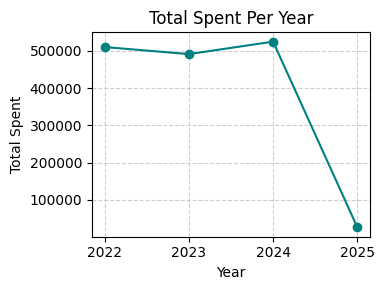

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.plot(total_revenue_per_year.index, total_revenue_per_year.values, marker='o', linestyle='-', color='teal')

plt.title("Total Spent Per Year")
plt.xlabel("Year")
plt.ylabel("Total Spent")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [91]:
df['Month'] = df['Transaction Date'].dt.month

monthly_revenue = df.groupby(['Year', 'Month'])['Total Spent'].sum().reset_index()

print(monthly_revenue.sample(5))

    Year  Month  Total Spent
6   2022      7      44471.5
21  2023     10      38322.0
26  2024      3      42861.5
32  2024      9      42161.5
0   2022      1      52911.5


In [92]:
pivot_table = monthly_revenue.pivot(index='Month', columns='Year', values='Total Spent')

In [93]:
import calendar
month_names = [calendar.month_abbr[m] for m in pivot_table.index]

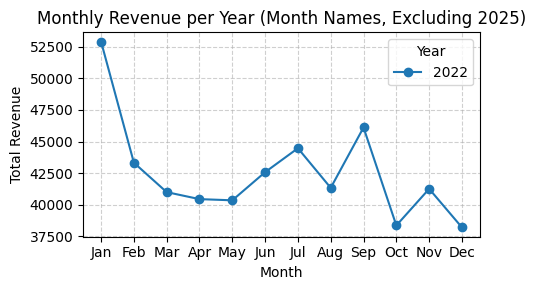

In [94]:
plt.figure(figsize=(5,3))
plt.plot(month_names, pivot_table[2022], marker='o',label='2022' )

plt.title('Monthly Revenue per Year (Month Names, Excluding 2025)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

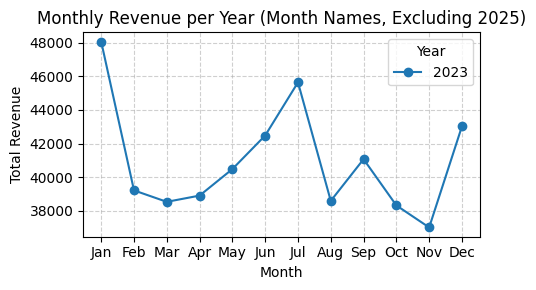

In [95]:
plt.figure(figsize=(5,3))
plt.plot(month_names, pivot_table[2023], marker='o',label='2023' )

plt.title('Monthly Revenue per Year (Month Names, Excluding 2025)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

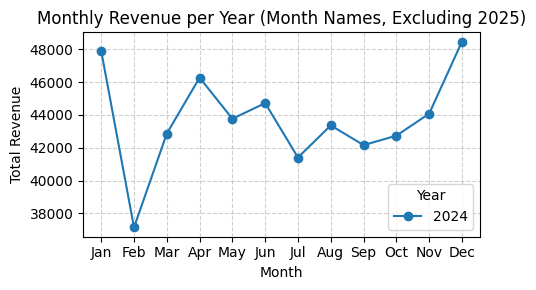

In [96]:
plt.figure(figsize=(5,3))
plt.plot(month_names, pivot_table[2024], marker='o',label='2024' )

plt.title('Monthly Revenue per Year (Month Names, Excluding 2025)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

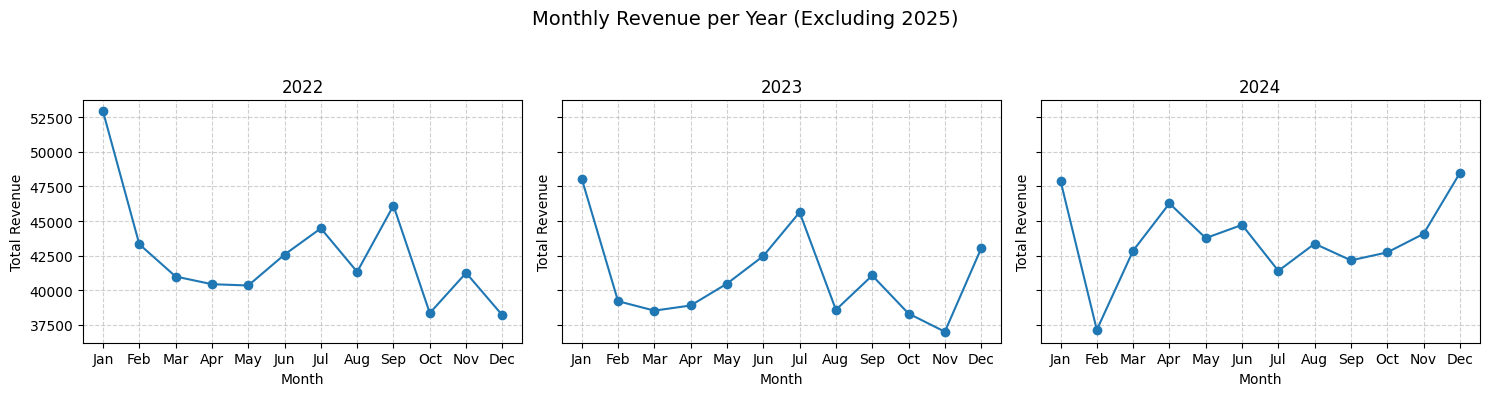

In [97]:
years_to_plot = [y for y in pivot_table.columns if y != 2025]
n = len(years_to_plot)


fig, axes = plt.subplots(1, n, figsize=(5*n, 4), sharey=True)


if n == 1:
    axes = [axes]

for ax, year in zip(axes, years_to_plot):
    ax.plot(month_names, pivot_table[year], marker='o')
    ax.set_title(f'{year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Revenue')
    ax.grid(True, linestyle='--', alpha=0.6)

fig.suptitle('Monthly Revenue per Year (Excluding 2025)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

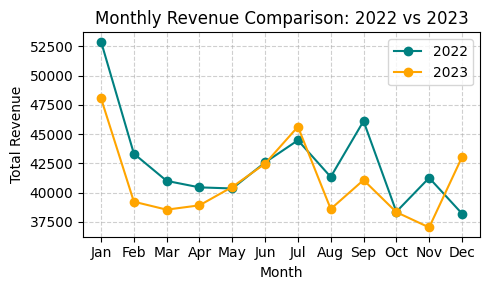

In [98]:
monthly_2022 = df[df['Year'] == 2022].groupby('Month')['Total Spent'].sum()

monthly_2023 = df[df['Year'] == 2023].groupby('Month')['Total Spent'].sum()

month_nums = sorted(set(monthly_2022.index).union(set(monthly_2023.index)))
month_names = [calendar.month_abbr[m] for m in month_nums]

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(month_names, monthly_2022.reindex(month_nums).values, marker='o', label='2022', color='teal')
plt.plot(month_names, monthly_2023.reindex(month_nums).values, marker='o', label='2023', color='orange')

plt.title('Monthly Revenue Comparison: 2022 vs 2023')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### yearly growth or decline 

In [99]:
yearly_revenue = df.groupby('Year')['Total Spent'].sum().sort_index()

pct_change = yearly_revenue.pct_change() * 100  # Automatically does current year vs previous year


# Table
yearly_comparison = pd.DataFrame({
    'Total Revenue': yearly_revenue,
    '% Change from Previous Year': pct_change
})

print("\nYearly Revenue & Change from Previous Year:\n")
yearly_comparison



Yearly Revenue & Change from Previous Year:



,Total Revenue,% Change from Previous Year
Year,,
2022,510329.5,NaN
2023,491312.0,-3.726514
2024,524881.0,6.832522
2025,25548.5,-95.132516


## YEAR 2022

### 1. Monthly revenus for 2022

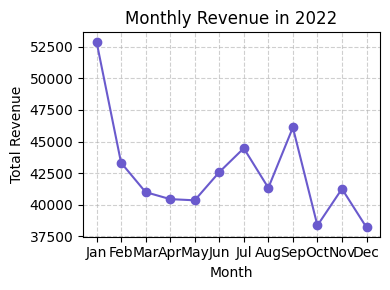


Monthly Revenue in 2022:



,Month,Revenue (₹)
0,Jan,52911.5
1,Feb,43325.5
2,Mar,40996.0
3,Apr,40442.0
4,May,40347.5
5,Jun,42576.0
6,Jul,44471.5
7,Aug,41333.5
8,Sep,46113.5
9,Oct,38355.0


In [30]:
df_2022 = df[df['Year'] == 2022]

monthly_rev_2022 = df_2022.groupby('Month')['Total Spent'].sum()

month_nums_2022 = monthly_rev_2022.index
month_names_2022 = [calendar.month_abbr[m] for m in month_nums_2022]

plt.figure(figsize=(4, 3))
plt.plot(month_names_2022, monthly_rev_2022.values, marker='o', color='slateblue')
plt.title('Monthly Revenue in 2022')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


monthly_rev_table = pd.DataFrame({
    'Month': month_names_2022,
    'Revenue (₹)': monthly_rev_2022.values
})

print("\nMonthly Revenue in 2022:\n")
monthly_rev_table


### We'll find the categories and their revenue

In [31]:
category_rev_2022 = df_2022.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

category_table_2022 = pd.DataFrame({
    'Category': category_rev_2022.index,
    'Revenue (₹)': category_rev_2022.values
})

print("\nCategory-wise Revenue in 2022:\n")
category_table_2022


Category-wise Revenue in 2022:



,Category,Revenue (₹)
0,Butchers,79395.5
1,electric,71480.5
2,Beverages,63555.0
3,Patisserie,62675.5
4,Furniture,60574.0
5,Milk Products,58509.5
6,computers,57113.5
7,Food,57026.0


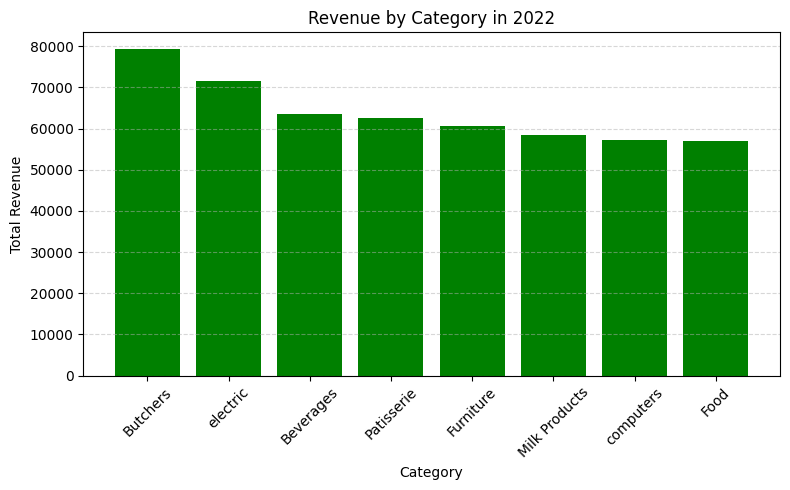

In [32]:
plt.figure(figsize=(8, 5))
plt.bar(category_rev_2022.index, category_rev_2022.values, color='green')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Revenue by Category in 2022')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Revenue through different payment methods


Revenue by Payment Method in 2022:

Payment Method  Revenue (₹)
          Cash     174221.0
   Credit Card     169451.0
Digital Wallet     166657.5


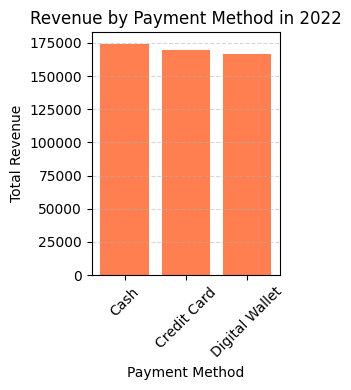

In [100]:
payment_rev_2022 = df_2022.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)
payment_table_2022 = pd.DataFrame({
    'Payment Method': payment_rev_2022.index,
    'Revenue (₹)': payment_rev_2022.values
})

print("\nRevenue by Payment Method in 2022:\n")
print(payment_table_2022.to_string(index=False))

plt.figure(figsize=(3, 4))
plt.bar(payment_rev_2022.index, payment_rev_2022.values, color='coral')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.title('Revenue by Payment Method in 2022')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Revenue through different locations


Revenue by Location in 2022:

Location  Revenue (₹)
  Online     268915.0
In-store     241414.5


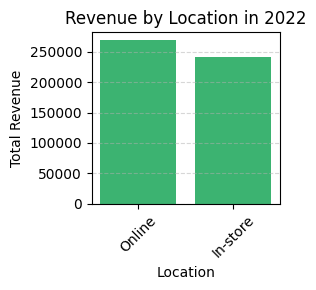

In [101]:
location_rev_2022 = df_2022.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)

location_table_2022 = pd.DataFrame({
    'Location': location_rev_2022.index,
    'Revenue (₹)': location_rev_2022.values
})

print("\nRevenue by Location in 2022:\n")
print(location_table_2022.to_string(index=False))


plt.figure(figsize=(3, 3))
plt.bar(location_rev_2022.index, location_rev_2022.values, color='mediumseagreen')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.title('Revenue by Location in 2022')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




In [102]:
total_transactions_2022 = len(df_2022)
print(f"Total number of transactions in 2022: {total_transactions_2022}")


Total number of transactions in 2022: 4134


In [103]:
customer_spending_2022 = df_2022.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending=False)

top_customers_2022 = customer_spending_2022.head(10)


customer_table_2022 = pd.DataFrame({
    'Customer ID': top_customers_2022.index,
    'Total Spent (₹)': top_customers_2022.values
})

print("\nTop 10 Customers by Spending in 2022:\n")
print(customer_table_2022.to_string(index=False))



Top 10 Customers by Spending in 2022:

Customer ID  Total Spent (₹)
    CUST_24          24137.0
    CUST_23          23756.5
    CUST_22          22791.0
    CUST_04          22506.5
    CUST_11          22201.0
    CUST_05          21427.0
    CUST_18          21196.5
    CUST_14          21121.0
    CUST_10          20503.5
    CUST_19          20494.5


### For January to April (the declining phase)

In [104]:

jan_may_2022 = df_2022[df_2022['Month'].between(2, 4)]
num_months = 3


jan_may_cat_rev = jan_may_2022.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

total_jan_may_revenue = jan_may_cat_rev.sum()


jan_may_cat_table = pd.DataFrame({
    'Category': jan_may_cat_rev.index,
    'Total Revenue (₹)': jan_may_cat_rev.values,
    'Avg Monthly Revenue (₹)': (jan_may_cat_rev / num_months).round(2),
    '% of Total Revenue': (jan_may_cat_rev / total_jan_may_revenue * 100).round(2)
})

print("\nCategory-wise Revenue (Jan–April 2022):\n")
jan_may_cat_table.iloc[:,1:]



Category-wise Revenue (Jan–April 2022):



,Total Revenue (₹),Avg Monthly Revenue (₹),% of Total Revenue
Category,,,
electric,19064.0,6354.67,15.28
Butchers,18095.5,6031.83,14.50
Furniture,16488.5,5496.17,13.22
Patisserie,15819.0,5273.00,12.68
Milk Products,15221.0,5073.67,12.20
Beverages,15046.0,5015.33,12.06
computers,13171.5,4390.50,10.56
Food,11858.0,3952.67,9.50


### For May to July (the growing phase)

In [105]:

may_jul_2022 = df_2022[df_2022['Month'].between(5, 7)]


may_jul_cat_rev = may_jul_2022.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)


num_months_may_jul = 3


total_may_jul_revenue = may_jul_cat_rev.sum()


may_jul_cat_table = pd.DataFrame({
    'Category': may_jul_cat_rev.index,
    'Total Revenue (₹)': may_jul_cat_rev.values,
    'Avg Monthly Revenue (₹)': (may_jul_cat_rev / num_months_may_jul).round(2),
    '% of Total Revenue': (may_jul_cat_rev / total_may_jul_revenue * 100).round(2)
})

print("\nCategory-wise Revenue Summary (May–July 2022):\n")
may_jul_cat_table.iloc[:,1:]



Category-wise Revenue Summary (May–July 2022):



,Total Revenue (₹),Avg Monthly Revenue (₹),% of Total Revenue
Category,,,
electric,18681.5,6227.17,14.66
Butchers,18401.5,6133.83,14.44
Beverages,17166.0,5722.00,13.47
Patisserie,15358.5,5119.50,12.06
Furniture,14821.5,4940.50,11.63
computers,14731.5,4910.50,11.56
Food,14232.5,4744.17,11.17
Milk Products,14002.0,4667.33,10.99


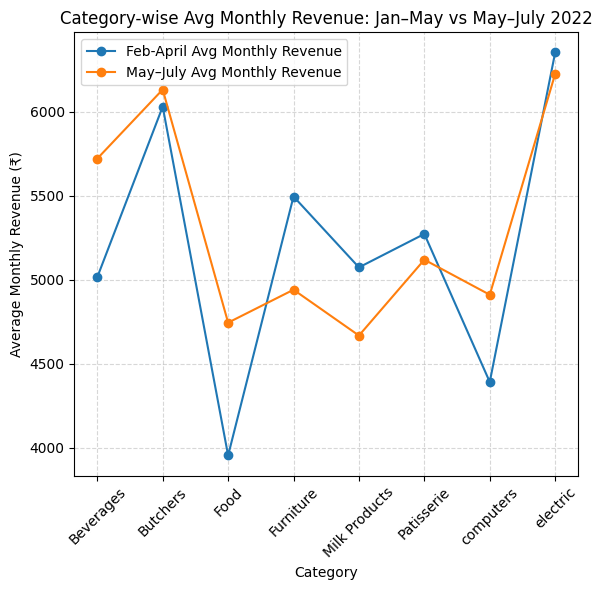

In [106]:

avg_jan_may = (jan_may_cat_rev / num_months).round(2)
avg_may_jul = (may_jul_cat_rev / num_months_may_jul).round(2)


categories_union = sorted(set(avg_jan_may.index).union(avg_may_jul.index))
avg_jan_may = avg_jan_may.reindex(categories_union, fill_value=0)
avg_may_jul = avg_may_jul.reindex(categories_union, fill_value=0)


plt.figure(figsize=(6, 6))
plt.plot(categories_union, avg_jan_may.values, marker='o', label='Feb-April Avg Monthly Revenue')
plt.plot(categories_union, avg_may_jul.values, marker='o', label='May–July Avg Monthly Revenue')
plt.title('Category-wise Avg Monthly Revenue: Jan–May vs May–July 2022')
plt.xlabel('Category')
plt.ylabel('Average Monthly Revenue (₹)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
total_customers_jan_may = jan_may_2022['Customer ID'].count()/3
print(f"average number of  customers (Jan–April 2022): {total_customers_jan_may}")


average number of  customers (Jan–April 2022): 343.3333333333333


In [41]:
total_customers_may_july = may_jul_2022['Customer ID'].count()/3
print(f"Average number of  customers (May-July 2022): {total_customers_may_july}")


Average number of  customers (May-July 2022): 346.3333333333333


In [107]:

cust_entries_jan_may = jan_may_2022.groupby('Category')['Customer ID'].count()

cust_entries_may_jul = may_jul_2022.groupby('Category')['Customer ID'].count()


customer_entry_table = pd.DataFrame({
    'Jan–May Entries': cust_entries_jan_may,
    'May–July Entries': cust_entries_may_jul
}).fillna(0).astype(int) 

print("\nCustomer Entries per Category:\n")
print(customer_entry_table.to_string())



Customer Entries per Category:

               Jan–May Entries  May–July Entries
Category                                        
Beverages                  120               139
Butchers                   127               140
Food                       116               118
Furniture                  150               126
Milk Products              136               130
Patisserie                 131               120
computers                  113               127
electric                   137               139


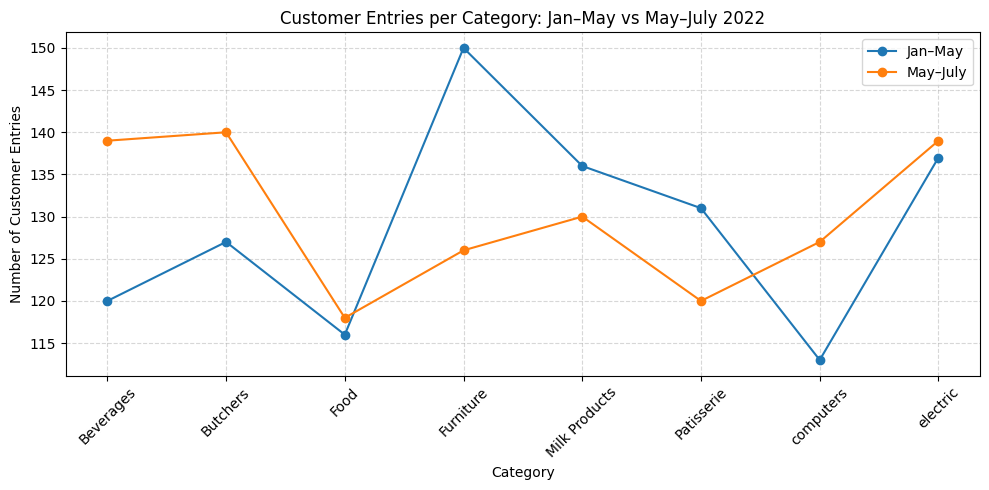

In [108]:

all_categories = sorted(set(cust_entries_jan_may.index).union(cust_entries_may_jul.index))
cust_entries_jan_may = cust_entries_jan_may.reindex(all_categories, fill_value=0)
cust_entries_may_jul = cust_entries_may_jul.reindex(all_categories, fill_value=0)

plt.figure(figsize=(10, 5))
plt.plot(all_categories, cust_entries_jan_may.values, marker='o', label='Jan–May')
plt.plot(all_categories, cust_entries_may_jul.values, marker='o', label='May–July')
plt.title('Customer Entries per Category: Jan–May vs May–July 2022')
plt.xlabel('Category')
plt.ylabel('Number of Customer Entries')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [44]:
# Total revenue and customer entries: Jan–May
rev_jan_may = jan_may_2022.groupby('Category')['Total Spent'].sum()
entries_jan_may = jan_may_2022.groupby('Category')['Customer ID'].count()
avg_spent_per_entry_jan_may = (rev_jan_may / entries_jan_may).round(2)

# Total revenue and customer entries: May–July
rev_may_jul = may_jul_2022.groupby('Category')['Total Spent'].sum()
entries_may_jul = may_jul_2022.groupby('Category')['Customer ID'].count()
avg_spent_per_entry_may_jul = (rev_may_jul / entries_may_jul).round(2)

# Combine into a single table
final_table = pd.DataFrame({
    'Customer Entries Jan–May': entries_jan_may,
    'Avg Spent per Entry Jan–May (₹)': avg_spent_per_entry_jan_may,
    'Customer Entries May–July': entries_may_jul,
    'Avg Spent per Entry May–July (₹)': avg_spent_per_entry_may_jul
}).fillna(0).astype({'Customer Entries Jan–May': int, 'Customer Entries May–July': int})

print("\nCategory-wise Customer Entries and Avg Spent per Entry:\n")
final_table



Category-wise Customer Entries and Avg Spent per Entry:



,Customer Entries Jan–May,Avg Spent per Entry Jan–May (₹),Customer Entries May–July,Avg Spent per Entry May–July (₹)
Category,,,,
Beverages,120,125.38,139,123.50
Butchers,127,142.48,140,131.44
Food,116,102.22,118,120.61
Furniture,150,109.92,126,117.63
Milk Products,136,111.92,130,107.71
Patisserie,131,120.76,120,127.99
computers,113,116.56,127,116.00
electric,137,139.15,139,134.40


In [109]:

rev_jan_may_discount = jan_may_2022.groupby(['Month', 'Discount Applied'])['Total Spent'].sum().unstack().fillna(0)

rev_may_jul_discount = may_jul_2022.groupby(['Month', 'Discount Applied'])['Total Spent'].sum().unstack().fillna(0)

rev_jan_may_discount.index = [calendar.month_abbr[m] for m in rev_jan_may_discount.index]
rev_may_jul_discount.index = [calendar.month_abbr[m] for m in rev_may_jul_discount.index]

print("\nMonthly Revenue by Discount Status (Jan–May 2022):\n")
print(rev_jan_may_discount.round(2).to_string())

print("\nMonthly Revenue by Discount Status (May–July 2022):\n")
print(rev_may_jul_discount.round(2).to_string())



Monthly Revenue by Discount Status (Jan–May 2022):

Discount Applied    False    True 
Feb               13735.5  14867.5
Mar               13667.0  13613.5
Apr               15183.5  12260.5

Monthly Revenue by Discount Status (May–July 2022):

Discount Applied    False    True 
May               12110.5  14839.0
Jun               13624.0  13304.0
Jul               14955.0  17241.0


In [110]:
avg_jan_may_disc = rev_jan_may_discount.mean()
avg_may_jul_disc = rev_may_jul_discount.mean()

all_discounts = sorted(set(avg_jan_may_disc.index).union(avg_may_jul_disc.index))
avg_jan_may_disc = avg_jan_may_disc.reindex(all_discounts, fill_value=0)
avg_may_jul_disc = avg_may_jul_disc.reindex(all_discounts, fill_value=0)

avg_discount_table = pd.DataFrame({
    'Avg Monthly Revenue Feb-April (₹)': avg_jan_may_disc,
    'Avg Monthly Revenue May–Jul (₹)': avg_may_jul_disc
}).round(2)

print("\nAverage Monthly Revenue by Discount Status:\n")
print(avg_discount_table.to_string())



Average Monthly Revenue by Discount Status:

                  Avg Monthly Revenue Feb-April (₹)  Avg Monthly Revenue May–Jul (₹)
Discount Applied                                                                    
False                                      14195.33                         13563.17
True                                       13580.50                         15128.00


## year 2023

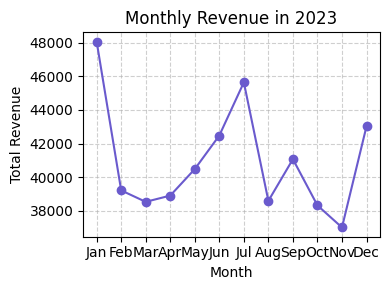


Monthly Revenue in 2023:



,Month,Revenue (₹)
0,Jan,48052.5
1,Feb,39214.5
2,Mar,38534.5
3,Apr,38905.5
4,May,40480.5
5,Jun,42474.0
6,Jul,45632.5
7,Aug,38592.0
8,Sep,41069.0
9,Oct,38322.0


In [111]:

df_2023 = df[df['Year'] == 2023]


monthly_rev_2023 = df_2023.groupby('Month')['Total Spent'].sum()


month_nums_2023 = monthly_rev_2023.index
month_names_2023 = [calendar.month_abbr[m] for m in month_nums_2023]


plt.figure(figsize=(4, 3))
plt.plot(month_names_2023, monthly_rev_2023.values, marker='o', color='slateblue')
plt.title('Monthly Revenue in 2023')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

monthly_rev_table = pd.DataFrame({
    'Month': month_names_2023, 
    'Revenue (₹)': monthly_rev_2023.values
})

print("\nMonthly Revenue in 2023:\n")
monthly_rev_table


In [112]:
category_rev_2023 = df_2023.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

category_table_2023 = pd.DataFrame({
    'Category': category_rev_2023.index,
    'Revenue (₹)': category_rev_2023.values
})

print("\nCategory-wise Revenue in 2023:\n")
category_table_2022


Category-wise Revenue in 2023:



,Category,Revenue (₹)
0,Butchers,79395.5
1,electric,71480.5
2,Beverages,63555.0
3,Patisserie,62675.5
4,Furniture,60574.0
5,Milk Products,58509.5
6,computers,57113.5
7,Food,57026.0


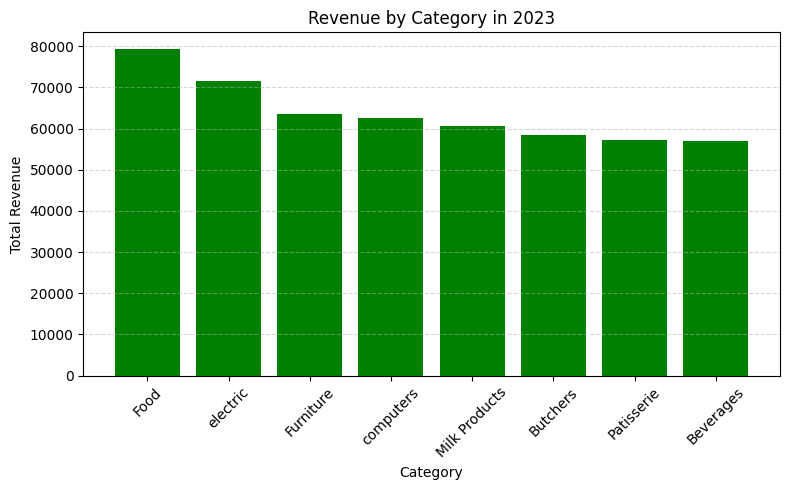

In [113]:
plt.figure(figsize=(8, 5))
plt.bar(category_rev_2023.index, category_rev_2022.values, color='green')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Revenue by Category in 2023')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Revenue by Payment Method in 2023:

Payment Method  Revenue (₹)
          Cash     168361.5
   Credit Card     164279.5
Digital Wallet     158671.0


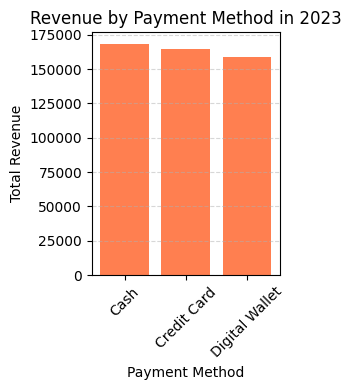

In [114]:
payment_rev_2023 = df_2023.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)
payment_table_2023 = pd.DataFrame({
    'Payment Method': payment_rev_2023.index,
    'Revenue (₹)': payment_rev_2023.values
})

print("\nRevenue by Payment Method in 2023:\n")
print(payment_table_2023.to_string(index=False))

plt.figure(figsize=(3, 4))
plt.bar(payment_rev_2023.index, payment_rev_2023.values, color='coral')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.title('Revenue by Payment Method in 2023')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Revenue by Location in 2022:

Location  Revenue (₹)
In-store     246202.5
  Online     245109.5


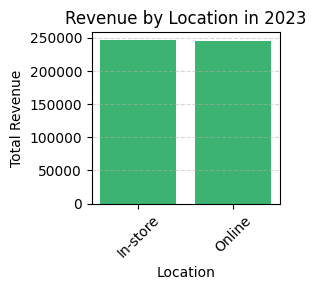

In [115]:
location_rev_2023 = df_2023.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)

location_table_2023 = pd.DataFrame({
    'Location': location_rev_2023.index,
    'Revenue (₹)': location_rev_2023.values
})

print("\nRevenue by Location in 2022:\n")
print(location_table_2023.to_string(index=False))


plt.figure(figsize=(3, 3))
plt.bar(location_rev_2023.index, location_rev_2023.values, color='mediumseagreen')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.title('Revenue by Location in 2023')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




In [116]:
total_transactions_2023 = len(df_2023)
print(f"Total number of transactions in 2023: {total_transactions_2023}")


Total number of transactions in 2023: 3987


In [117]:
customer_spending_2023 = df_2023.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending=False)

top_customers_2023 = customer_spending_2023.head(10)

customer_table_2023 = pd.DataFrame({
    'Customer ID': top_customers_2023.index,
    'Total Spent (₹)': top_customers_2023.values
})

print("\nTop 10 Customers by Spending in 2023:\n")
print(customer_table_2023.to_string(index=False))



Top 10 Customers by Spending in 2023:

Customer ID  Total Spent (₹)
    CUST_08          23174.0
    CUST_05          22281.5
    CUST_09          22084.0
    CUST_16          21728.5
    CUST_21          21598.0
    CUST_13          21260.5
    CUST_20          21234.5
    CUST_17          21157.5
    CUST_03          20663.0
    CUST_14          20559.0


## Detailed analysis of January and February

In [118]:
jan_23 = df_2023[df_2023['Month'].between(1,1)]
num_months = 1

jan_rev = jan_23.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

total_jan_revenue = jan_rev.sum()

jan_table = pd.DataFrame({
    'Category': jan_rev.index,
    'Total Revenue (₹)': jan_rev.values,
    'Avg Monthly Revenue (₹)': (jan_rev / num_months).round(2),
    '% of Total Revenue': (jan_rev / total_jan_revenue * 100).round(2)
})

print("\nCategory-wise Revenue (Jan 2023):\n")
jan_table.iloc[:,1:]



Category-wise Revenue (Jan 2023):



,Total Revenue (₹),Avg Monthly Revenue (₹),% of Total Revenue
Category,,,
computers,7366.0,7366.0,15.33
Milk Products,7005.5,7005.5,14.58
Food,6775.0,6775.0,14.10
Beverages,6360.0,6360.0,13.24
Patisserie,5821.5,5821.5,12.11
electric,5235.0,5235.0,10.89
Furniture,5079.5,5079.5,10.57
Butchers,4410.0,4410.0,9.18


In [119]:
feb_23 = df_2023[df_2023['Month'].between(2,2)]
num_months = 1

feb_rev = feb_23.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

total_feb_revenue = feb_rev.sum()


feb_table = pd.DataFrame({
    'Category': feb_rev.index,
    'Total Revenue (₹)': feb_rev.values,
    'Avg Monthly Revenue (₹)': (feb_rev / num_months).round(2),
    '% of Total Revenue': (feb_rev / total_feb_revenue * 100).round(2)
})

print("\nCategory-wise Revenue (Feb 2023):\n")
feb_table.iloc[:,1:]



Category-wise Revenue (Feb 2023):



,Total Revenue (₹),Avg Monthly Revenue (₹),% of Total Revenue
Category,,,
electric,5830.5,5830.5,14.87
Beverages,5806.5,5806.5,14.81
Food,5300.0,5300.0,13.52
Butchers,4749.5,4749.5,12.11
Furniture,4700.0,4700.0,11.99
Milk Products,4515.0,4515.0,11.51
computers,4494.5,4494.5,11.46
Patisserie,3818.5,3818.5,9.74


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month
34,TXN_1621497,CUST_06,Patisserie,NaN,23.0,NaN,NaN,Cash,In-store,2023-02-18,NaN,2023,2
45,TXN_9587232,CUST_20,Food,Item_12_FOOD,21.5,5.0,107.5,Digital Wallet,Online,2023-02-28,True,2023,2
76,TXN_1142481,CUST_02,Beverages,Item_22_BEV,36.5,6.0,219.0,Cash,In-store,2023-02-07,True,2023,2
94,TXN_5938028,CUST_18,computers,Item_7_CEA,14.0,1.0,14.0,Digital Wallet,Online,2023-02-20,True,2023,2
152,TXN_3380295,CUST_08,Beverages,Item_6_BEV,12.5,5.0,62.5,Cash,Online,2023-02-08,False,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12457,TXN_1352194,CUST_17,electric,NaN,NaN,4.0,86.0,Credit Card,Online,2023-02-26,NaN,2023,2
12467,TXN_8285743,CUST_16,Patisserie,Item_20_PAT,33.5,8.0,268.0,Cash,Online,2023-02-17,True,2023,2
12474,TXN_2752036,CUST_20,Food,Item_17_FOOD,29.0,6.0,174.0,Cash,In-store,2023-02-04,True,2023,2
12509,TXN_4853688,CUST_21,Furniture,Item_1_FUR,5.0,8.0,40.0,Credit Card,Online,2023-02-15,True,2023,2


## YEAR 2024

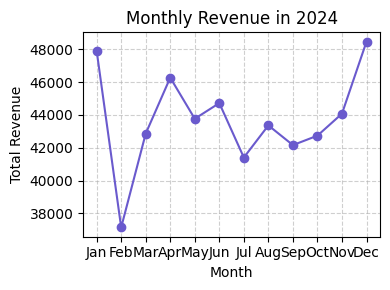


Monthly Revenue in 2024:



,Month,Revenue (₹)
0,Jan,47908.5
1,Feb,37145.0
2,Mar,42861.5
3,Apr,46271.0
4,May,43766.5
5,Jun,44721.0
6,Jul,41405.0
7,Aug,43362.0
8,Sep,42161.5
9,Oct,42736.5


In [121]:

df_2024 = df[df['Year'] == 2024]

monthly_rev_2024 = df_2024.groupby('Month')['Total Spent'].sum()

month_nums_2024 = monthly_rev_2024.index
month_names_2024 = [calendar.month_abbr[m] for m in month_nums_2024]

# --- Line Plot ---
plt.figure(figsize=(4, 3))
plt.plot(month_names_2024, monthly_rev_2024.values, marker='o', color='slateblue')
plt.title('Monthly Revenue in 2024')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Table ---
monthly_rev_table = pd.DataFrame({
    'Month': month_names_2024, 
    'Revenue (₹)': monthly_rev_2024.values
})

print("\nMonthly Revenue in 2024:\n")
monthly_rev_table


In [122]:

category_rev_2024 = df_2024.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)


category_table_2024 = pd.DataFrame({
    'Category': category_rev_2024.index,
    'Revenue (₹)': category_rev_2024.values
})

print("\nCategory-wise Revenue in 2024:\n")
category_table_2024


Category-wise Revenue in 2024:



,Category,Revenue (₹)
0,Beverages,74205.5
1,Furniture,68619.0
2,computers,66303.5
3,Butchers,66067.5
4,Food,65914.5
5,electric,65486.5
6,Patisserie,61533.5
7,Milk Products,56751.0


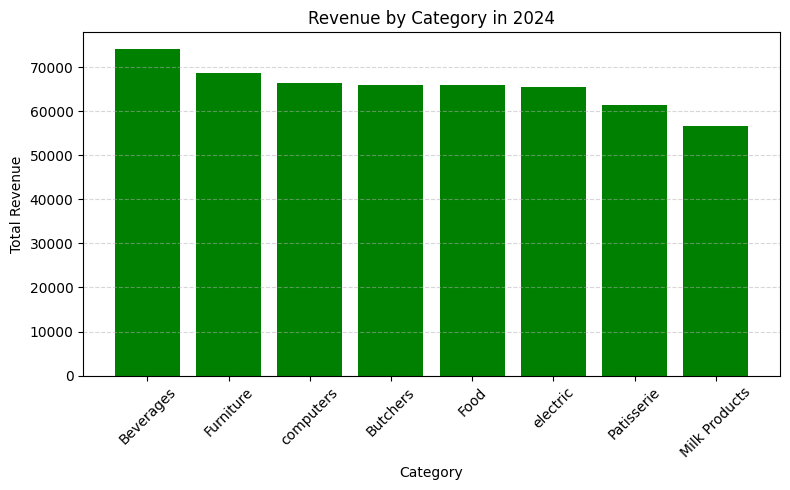

In [123]:
plt.figure(figsize=(8, 5))
plt.bar(category_rev_2024.index, category_rev_2024.values, color='green')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Revenue by Category in 2024')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Revenue by Payment Method in 2023:

Payment Method  Revenue (₹)
          Cash     187458.0
Digital Wallet     172339.5
   Credit Card     165083.5


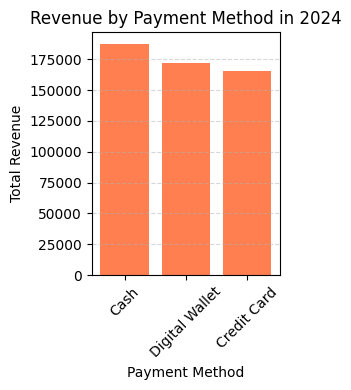

In [124]:
payment_rev_2024 = df_2024.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)
payment_table_2024 = pd.DataFrame({
    'Payment Method': payment_rev_2024.index,
    'Revenue (₹)': payment_rev_2024.values
})

# Print the table
print("\nRevenue by Payment Method in 2023:\n")
print(payment_table_2024.to_string(index=False))


# Bar chart
plt.figure(figsize=(3, 4))
plt.bar(payment_rev_2024.index, payment_rev_2024.values, color='coral')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.title('Revenue by Payment Method in 2024')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Revenue by Location in 2022:

Location  Revenue (₹)
  Online     265246.5
In-store     259634.5


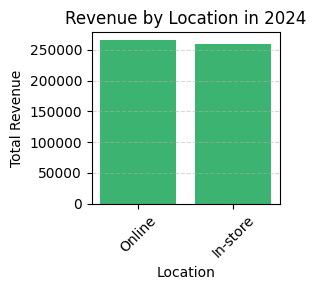

In [125]:
# Group by Location and sum revenue
location_rev_2024 = df_2024.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)


# Table format
location_table_2024 = pd.DataFrame({
    'Location': location_rev_2024.index,
    'Revenue (₹)': location_rev_2024.values
})

print("\nRevenue by Location in 2022:\n")
print(location_table_2024.to_string(index=False))


plt.figure(figsize=(3, 3))
plt.bar(location_rev_2024.index, location_rev_2024.values, color='mediumseagreen')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.title('Revenue by Location in 2024')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




In [126]:
total_transactions_2024 = len(df_2024)
print(f"Total number of transactions in 2023: {total_transactions_2024}")


Total number of transactions in 2023: 4241


In [127]:
customer_spending_2024 = df_2024.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending=False)


top_customers_2024 = customer_spending_2024.head(10)


customer_table_2024 = pd.DataFrame({
    'Customer ID': top_customers_2024.index,
    'Total Spent (₹)': top_customers_2024.values
})

print("\nTop 10 Customers by Spending in 2024:\n")
print(customer_table_2024.to_string(index=False))



Top 10 Customers by Spending in 2024:

Customer ID  Total Spent (₹)
    CUST_24          25255.0
    CUST_08          23706.5
    CUST_02          23149.5
    CUST_05          22783.0
    CUST_16          22766.5
    CUST_13          22509.0
    CUST_01          22332.5
    CUST_22          22313.5
    CUST_21          22092.0
    CUST_12          21754.5


## Detailed analysing of January and February

In [128]:

jan_24 = df_2024[df_2024['Month'].between(1,1)]
num_months = 1


jan_rev = jan_24.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

total_jan_revenue = jan_rev.sum()


jan_table = pd.DataFrame({
    'Category': jan_rev.index,
    'Total Revenue (₹)': jan_rev.values,
    'Avg Monthly Revenue (₹)': (jan_rev / num_months).round(2),
    '% of Total Revenue': (jan_rev / total_jan_revenue * 100).round(2)
})

print("\nCategory-wise Revenue (Jan 2024):\n")
jan_table.iloc[:,1:]



Category-wise Revenue (Jan 2024):



,Total Revenue (₹),Avg Monthly Revenue (₹),% of Total Revenue
Category,,,
Butchers,7093.0,7093.0,14.81
electric,7040.5,7040.5,14.70
Food,6616.5,6616.5,13.81
Furniture,6529.0,6529.0,13.63
Beverages,6135.5,6135.5,12.81
computers,6110.5,6110.5,12.75
Patisserie,4467.5,4467.5,9.33
Milk Products,3916.0,3916.0,8.17


In [129]:
# Filter for Feb 2023
feb_24 = df_2024[df_2024['Month'].between(2,2)]
num_months = 1

# Group by Category and sum Total Spent
feb_rev = feb_24.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

total_feb_revenue = feb_rev.sum()

# Format as table
feb_table = pd.DataFrame({
    'Category': feb_rev.index,
    'Total Revenue (₹)': feb_rev.values,
    'Avg Monthly Revenue (₹)': (feb_rev / num_months).round(2),
    '% of Total Revenue': (feb_rev / total_feb_revenue * 100).round(2)
})

print("\nCategory-wise Revenue (Feb 2024):\n")
feb_table.iloc[:,1:]



Category-wise Revenue (Feb 2024):



,Total Revenue (₹),Avg Monthly Revenue (₹),% of Total Revenue
Category,,,
electric,5231.5,5231.5,14.08
Patisserie,4981.5,4981.5,13.41
Butchers,4960.5,4960.5,13.35
Beverages,4873.0,4873.0,13.12
Furniture,4461.5,4461.5,12.01
computers,4369.0,4369.0,11.76
Milk Products,4312.0,4312.0,11.61
Food,3956.0,3956.0,10.65


## For year 2025 - Only January

In [130]:

df_2025=df[df['Year']==2025]
jan_25 = df_2025[df_2025['Month'].between(1,1)]
num_months = 1


jan_rev = jan_25.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

total_jan_revenue = jan_rev.sum()


jan_table = pd.DataFrame({
    'Category': jan_rev.index,
    'Total Revenue (₹)': jan_rev.values,
    'Avg Monthly Revenue (₹)': (jan_rev / num_months).round(2),
    '% of Total Revenue': (jan_rev / total_jan_revenue * 100).round(2)
})

print("\nCategory-wise Revenue (Jan 2025):\n")
jan_table.iloc[:,1:]



Category-wise Revenue (Jan 2025):



,Total Revenue (₹),Avg Monthly Revenue (₹),% of Total Revenue
Category,,,
computers,4388.0,4388.0,17.18
Food,4267.5,4267.5,16.70
Butchers,3849.5,3849.5,15.07
Beverages,3554.5,3554.5,13.91
electric,2984.5,2984.5,11.68
Furniture,2686.0,2686.0,10.51
Milk Products,2086.0,2086.0,8.16
Patisserie,1732.5,1732.5,6.78


<BarContainer object of 8 artists>

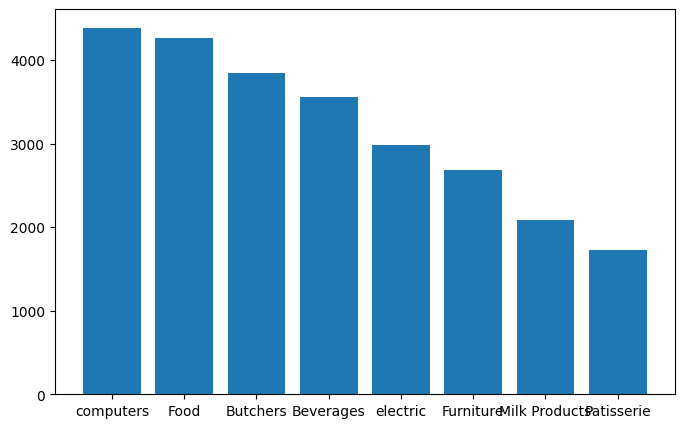

In [131]:
plt.figure(figsize=(8,5))
plt.bar(jan_table['Category'].values,jan_table['Total Revenue (₹)'].values)